# Exploratory Data Analysis of Epicurious Scrape in a JSON file

This is an idealized workflow for Aaron Chen in looking at data science problems. It likely isn't the best path, nor has he rigidly applied or stuck to this ideal, but he wishes that he worked this way more frequently.

## Purpose: Work through some exploratory data analysis of the Epicurious scrape on stream. Try to write some functions to help process the data.

### Author: Aaron Chen


---

### If needed, run shell commands here

In [1]:
# !python -m spacy download en_core_web_sm
# !python -c "import tkinter"

---

## External Resources

List out references or documentation that has helped you with this notebook

### Code
Regex Checker: https://regex101.com/

#### Scikit-learn
1. https://scikit-learn.org/stable/modules/decomposition.html#latent-dirichlet-allocation-lda
2. 

### Data

For this notebook, the data is stored in the repo base folder/data/raw

### Process

Are there steps or tutorials you are following? Those are things I try to list in Process

___

## Import necessary libraries

In [9]:
from bokeh.plotting import figure, output_file, save, show
from bokeh.io import output_notebook

from joblib import dump, load
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


---

## Define helper functions

My workflow is to try things with code cells, then when the code cells get messy and repetitive, to convert into helper functions that can be called.

When the helper functions are getting used a lot, it is usually better to convert them to scripts or classes that can be called/instantiated

### Import local script

I started grouping this in with importing libraries, but putting them at the bottom of the list

In [3]:
import project_path

import src.dataframe_preprocessor as dfpp
import src.nlp_processor as nlp_proc
import src.plotter as ILoveMyKeyboard
import src.transformers as skt

/home/awchen/Repos/Projects/MeaLeon/.venv/lib/python3.8/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


---

## Define global variables 
### Remember to refactor these out, not ideal

In [4]:
output_notebook()

Loading BokehJS ...

---

## Running Commentary

1. 

### To Do

1. 

---

## Importing and viewing the data as a dataframe

In [5]:
raw_data_path = '../../data/recipes-en-201706/epicurious-recipes_m2.json'

joblib_basepath = '../../joblib/2022.08.23/'

cv_path = joblib_basepath + 'countvec.joblib'
tfidf_path = joblib_basepath + 'tfidf.joblib'
full_df_path = joblib_basepath + 'recipes_with_cv.joblib'
reduced_df_path = joblib_basepath + 'reduced_df.joblib'
rfc_path = joblib_basepath + 'rfc_clf.joblib'
X_path = joblib_basepath + 'X.joblib'
y_path = joblib_basepath + 'y.joblib'
truncSVD_path = joblib_basepath + 'truncSVD.joblib'
truncSVD_transformed_path = joblib_basepath + 'truncSVD_transformed.joblib'
svd_numpy_path = joblib_basepath + 'SVD_numpy.joblib'
to_plot_path = joblib_basepath + 'to_plot.joblib'
tsne_path = joblib_basepath + 'tsne.joblib'
tsne_vis_path = joblib_basepath + 'tsne_vis.joblib'
kmeans_path = joblib_basepath + 'kmeans.joblib'

In [6]:
cv = load(cv_path)
tfidf = load(tfidf_path)
recipes_with_cv = load(full_df_path)
recipes_with_cv.set_index('id', inplace=True, drop=True)
reduced_df = load(reduced_df_path)
reduced_df.set_index('id', inplace=True, drop=True)
rfc_clf = load(rfc_path)
X = load(X_path)
y = load(y_path)
truncSVD = load(truncSVD_path)
X_train_svdTransform = load(truncSVD_transformed_path)
transformed_np = load(svd_numpy_path)
to_plot_tsne = load(to_plot_path)
t_sne = load(tsne_path)
vis_t_sne = load(tsne_vis_path)

In [7]:
to_plot_tsne

,cuisine_name,x,y,cuisine_id_num
id,,,,
54a45bfb6529d92b2c023f25,French,-1.214609,-7.310046,4391.0
54a4638719925f464b395c16,Kosher,0.168884,19.857890,2055.0
54a441126529d92b2c01b5f2,Asian,-11.234784,-4.876577,5991.0
54a409bb19925f464b37380a,American,1.254743,-16.597135,6943.0
54a42e1019925f464b3818d4,Southwestern,-7.332714,1.062514,134.0
...,...,...,...,...
54a436266529d92b2c018767,Italian,1.654323,6.660523,2388.0
54a466e16529d92b2c026f67,French,0.585036,-12.183883,4391.0
54a451cd6529d92b2c01eefd,American,1.435304,-19.972876,6943.0


In [8]:
to_plot_tsne.drop(['cuisine_name', 'cuisine_id_num'], axis=1, inplace=True)
to_plot_tsne.head()

,x,y
id,,
54a45bfb6529d92b2c023f25,-1.214609,-7.310046
54a4638719925f464b395c16,0.168884,19.857890
54a441126529d92b2c01b5f2,-11.234784,-4.876577
54a409bb19925f464b37380a,1.254743,-16.597135
54a42e1019925f464b3818d4,-7.332714,1.062514


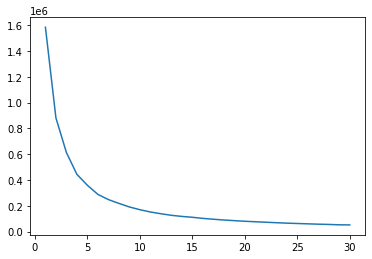

In [13]:
wcss = []

for i in range(1, 31):
    clustering = KMeans(n_clusters=i, random_state=200)
    clustering.fit(to_plot_tsne)
    wcss.append(clustering.inertia_)

ks = list(range(1,31))

sns.lineplot(x = ks, y = wcss);

The elbow method seems to indicate that 6 clusters is better